In [10]:
import json

In [11]:
import nltk
from nltk.corpus import stopwords
staph = stopwords.words('english')
staph.append("like")
staph.append("got")
staph.append("get")
staph.append("know")
staph.append("aint")
staph.append("dont")
staph.append("go")

In [677]:
path = "/Users/matthewhwang/Galvanize/Capstone1/Data/Discographies/_Mastered_Cleaned/Kendrick_Master_Discography_Cleaned.txt"

In [678]:
with open(path, 'r') as f:
    contents = json.load(f)["Discography"]
    all_words = []
    for each in contents:
        for words in each["lyrics"].split():
            all_words.append(words.lower())
    

In [14]:
len(all_words)

232709

In [15]:
reduced = [word for word in all_words if word not in staph]

In [16]:
len(reduced)

120491

In [282]:
import pandas as pd
df = pd.DataFrame(reduced)
df.columns = ["Word"]
df['Count'] = 1
g = df.groupby("Word")
new = g.count().sort_values("Count",ascending=False)

In [192]:
new.to_csv(r'/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Snoop Dogg_TopWords.csv')

In [679]:
hello = pd.DataFrame(contents)

In [680]:
hello["words per track"] = hello["lyrics"].apply(lambda x: len(x.split()))

In [681]:
hello["avg length of word"] = hello["lyrics"].apply(lambda x: len(x.strip())) / hello["words per track"] 

In [682]:
hello["im"] = hello["lyrics"].apply(lambda x: x.count("im"))

In [683]:
hello["im_ratio"] = hello['im'] / hello['words per track']

In [684]:
hello["im_ratio"].mean()

0.00858281919956363

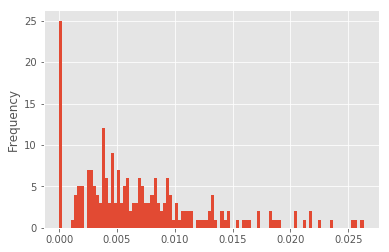

In [518]:
hello['im_ratio'].plot.hist(bins=100)

In [468]:
hello.head()

,artist,lyrics,track,words per track,avg length of word,im,im_ratio
0,lilwayne,Niggas be hatin...,highbeamin,466,6.969957,5,0.010730
1,lilwayne,where my niggaz...,comeon,589,6.020374,18,0.030560
2,lilwayne,Drop drop drop ...,dropitlikeitshot,1188,5.864478,8,0.006734
3,lilwayne,Ah hmmm hmmmm ...,enemyturf,557,7.107720,14,0.025135
4,lilwayne,Look look look A young ...,fucktheworld,556,6.057554,2,0.003597


In [685]:
hello["split"] = hello["lyrics"].apply(lambda x: x.split())
hello["curses"] = hello["split"].apply(lambda x: [n for n in badword_list if x.count(n)])

In [626]:
def badwordcount(text):
    count = 0
    for each in text:
        if each in badword_list:
            count += 1
    return count

In [686]:
hello["c_count"] = hello["split"].apply(lambda x: badwordcount(x))

In [687]:
hello["curse_ratio"] = hello["c_count"]/hello["words per track"]

In [688]:
hello.head()

,artist,lyrics,track,words per track,avg length of word,im,im_ratio,split,curses,c_count,curse_ratio
0,kendricklamar,Sit still and c...,isitlove,443,6.993228,3,0.006772,"[Sit, still, and, close, your, eyes, smoke, to...","[bitches, nigga]",5,0.011287
1,kendricklamar,Gimme that beat...,celebration,554,6.321300,10,0.018051,"[Gimme, that, beat, fool, This, a, full, time,...","[ass, bitches, fuck, fucked, fuckin, motherfuc...",24,0.043321
2,kendricklamar,Oh what up hoe ...,pp,537,6.601490,1,0.001862,"[Oh, what, up, hoe, Oh, what, up, I, said, oh,...","[ass, bitch, fuck, God, nigga, niggas, pussy, ...",13,0.024209
3,kendricklamar,One time ...,sheneedsme,469,6.961620,2,0.004264,"[One, time, Reporting, live, Compton, Californ...",[God],2,0.004264
4,kendricklamar,See yall dont understand me M...,iaminterlude,284,6.271127,1,0.003521,"[See, yall, dont, understand, me, My, plan, be...","[God, penis]",2,0.007042


In [689]:

for each in hello['curse_ratio'].to_list():
    WC_c_vals.append(each)


In [690]:
len(WC_c_vals)

897

/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0, 0.1)

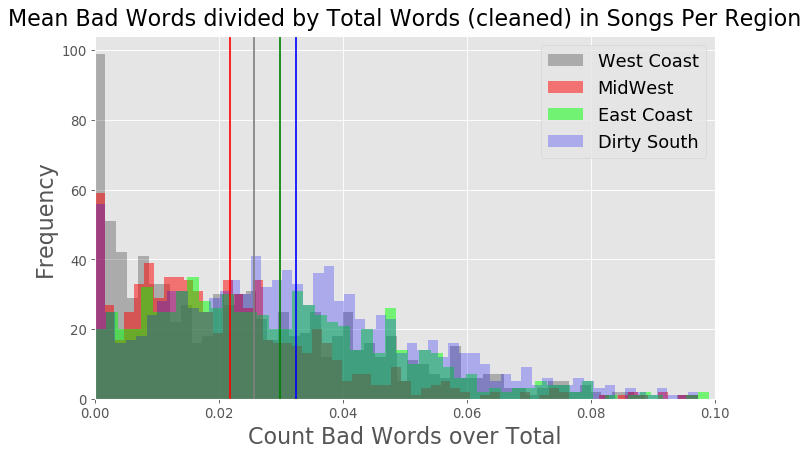

In [695]:
from matplotlib.pyplot import figure

plt.style.use('ggplot')
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(WC_c_vals, bins = 100,label="West Coast",color='k',fc=(0, 0, 0, 0.25));
plt.hist(MW_c_vals, bins = 100,label="MidWest",color='r',fc=(1, 0, 0, 0.5));
plt.hist(EC_c_vals, bins = 100,label="East Coast",color='g',fc=(0, 1, 0, 0.5));
plt.hist(DS_c_vals, bins = 100,label="Dirty South",color='b',fc=(0, 0, 1, 0.25));
plt.title("Mean Bad Words divided by Total Words (cleaned) in Songs Per Region",size=20,pad=10)
plt.axvline(statistics.mean(WC_c_vals),color='grey')
plt.axvline(statistics.mean(test),color='r')
plt.axvline(statistics.mean(EC_c_vals),color='g')
plt.axvline(statistics.mean(DS_c_vals),color='b')
plt.tick_params(labelsize="large")
plt.xlabel("Count Bad Words over Total",fontsize="20")
plt.ylabel("Frequency",fontsize="20")
plt.legend(prop={'size': 16})
plt.xlim(0,0.1)

In [394]:
import statistics
test = [x for x in MW_im_vals if str(x) != 'nan']
statistics.mean(DS_im_vals)


0.006252517021906888

/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0, 0.03)

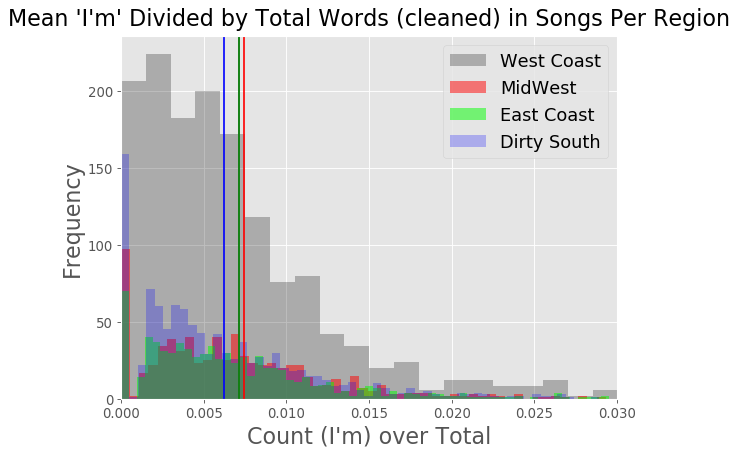

In [399]:
from matplotlib.pyplot import figure

plt.style.use('ggplot')
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(WC_im_vals, bins = 100,label="West Coast",color='k',fc=(0, 0, 0, 0.25));
plt.hist(MW_im_vals, bins = 100,label="MidWest",color='r',fc=(1, 0, 0, 0.5));
plt.hist(EC_im_vals, bins = 100,label="East Coast",color='g',fc=(0, 1, 0, 0.5));
plt.hist(DS_im_vals, bins = 100,label="Dirty South",color='b',fc=(0, 0, 1, 0.25));
plt.title("Mean 'I'm' Divided by Total Words (cleaned) in Songs Per Region",size=20,pad=10)
plt.axvline(0.0071570725045960425,color='grey')
plt.axvline(0.007414747172680575,color='r')
plt.axvline(0.007136663857011792,color='g')
plt.axvline(0.006252517021906888,color='b')
plt.tick_params(labelsize="large")
plt.xlabel("Count (I'm) over Total",fontsize="20")
plt.ylabel("Frequency",fontsize="20")
plt.legend(prop={'size': 16})
plt.xlim(0,0.03)

In [647]:
import json
my_dict = {"East Coast":EC_c_vals}

In [648]:
with open('EC_c_vals.txt', 'w') as outfile:
    json.dump(my_dict, outfile)

In [59]:
badwords = pd.read_csv("/Users/matthewhwang/Downloads/Badwords.csv")
badword_list = badwords["4r5e"].to_list()

In [ ]:
hello["count_bad_words"] = hello["lyrics"].apply(lambda x: )

In [25]:
hello.to_csv(r'/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Snoop Dogg_DF.csv')

# CONGREGATION

In [464]:
import pandas as pd
import glob
path = "/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Top Words Overall/*.csv"
df = pd.read_csv("/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Top Words Overall/Notorious B.I.G._TopWords.csv")

# for i,each in enumerate(glob.glob(path)):
#     df = pd.read_csv(each)
#     if i != 0:
#         df_pop["{}".format(i)] = df.head(10)
#     else:
#         df_pop = df.head(10)
df["artist"] = "Biggie Smalls"
df.head(10)



,Word,Count,artist
0,im,564,Biggie Smalls
1,shit,364,Biggie Smalls
2,nigga,364,Biggie Smalls
3,fuck,254,Biggie Smalls
4,see,246,Biggie Smalls
5,one,229,Biggie Smalls
6,big,214,Biggie Smalls
7,biggie,201,Biggie Smalls
8,man,200,Biggie Smalls
9,niggaz,199,Biggie Smalls


In [465]:
df_master = df_master.append(df.head(10))

In [451]:
# df_master

,Word,Count,artist
0,im,2566,Snoop Dogg
1,nigga,1425,Snoop Dogg
2,yeah,1094,Snoop Dogg
3,shit,921,Snoop Dogg
4,one,849,Snoop Dogg
5,dogg,803,Snoop Dogg
6,back,764,Snoop Dogg
7,see,758,Snoop Dogg
8,niggas,748,Snoop Dogg
9,bitch,708,Snoop Dogg


In [466]:
df_master.sort_values(['Count','Word'],ascending=False).groupby('artist').head(10)

,Word,Count,artist
0,im,4831,Lil' Wayne
0,im,3412,Eminem
1,nigga,2691,Lil' Wayne
0,im,2662,50 Cent
0,im,2566,Snoop Dogg
0,im,1980,2Pac
2,bitch,1950,Lil' Wayne
0,im,1770,2 Chainz
0,im,1737,Jay-Z
1,nigga,1695,50 Cent


In [425]:
g.head()

0    2566
1    1425
2    1094
3     921
4     849
5     803
6     764
7     758
8     748
9     708
0    1770
1     901
2     695
3     537
4     465
5     455
6     369
7     327
8     317
9     309
Name: Count, dtype: int64

In [467]:
df_master.to_csv(r'/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Combined Popular Words.csv')

# Bad word counts

In [150]:
curses = df[df["Word"].isin(badword_list)].sum().values[1]
total = df.sum().values
im = df[df["Word"]=="im"].sum().values[1]

In [151]:
print("im rate: {}".format(im/total))
print("swear rate: {}".format(curses/total))
print(im)
print(curses)
print(total)

im rate: [0.0212962]
swear rate: [0.0557469]
2566
6717
[120491]


In [152]:
df.head()

,Word,Count
0,im,2566
1,nigga,1425
2,yeah,1094
3,shit,921
4,one,849


UsageError: Line magic function `%` not found.


In [696]:
print(statistics.mean(WC_c_vals))
print(statistics.mean(test))
print(statistics.mean(EC_c_vals))
print(statistics.mean(DS_c_vals))

0.025696055112150475
0.021857240515405506
0.02991826340844248
0.032475139280108374
